In [1]:
# https://github.com/teamookla/ookla-open-data/blob/master/tutorials/aggregate_by_county_py.ipynb
# Speedtest Jupyter Notebook - demonstration code
# Pandas cheatsheet - https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
# https://colab.research.google.com/drivespeedtest/.../geopandas.ipynb
%matplotlib inline
# !pip install geopandas
# !pip install shapely
# !pip install rtree
# !apt-get install -y libspatialindex-dev
from datetime import datetime

import geopandas as gp
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from shapely.geometry import Point
# from adjustText import adjust_text - this library not loaded

In [2]:
def quarter_start(year: int, q: int) -> datetime:
    if not 1 <= q <= 4:
        raise ValueError("Quarter must be within [1, 2, 3, 4]")

    month = [1, 4, 7, 10]
    return datetime(year, month[q - 1], 1)


def get_tile_url(service_type: str, year: int, q: int) -> str:
    dt = quarter_start(year, q)

    base_url = "https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance"
    url = f"{base_url}/type%3D{service_type}/year%3D{dt:%Y}/quarter%3D{q}/{dt:%Y-%m-%d}_performance_fixed_tiles.zip"
    return url



In [3]:
tile_url = get_tile_url("fixed", 2020, 2)
tile_url



'https://ookla-open-data.s3-us-west-2.amazonaws.com/shapefiles/performance/type%3Dfixed/year%3D2020/quarter%3D2/2020-04-01_performance_fixed_tiles.zip'

In [4]:
print (datetime.now())

2020-12-13 17:20:15.301761


In [5]:
tiles = gp.read_file(tile_url)

In [6]:
print (datetime.now())

2020-12-13 17:50:41.661498


In [7]:
len(tiles)

6938763

In [8]:
au_tiles = tiles.cx[113.338953:153.569469 ,	-43.634597:-10.668186]
len(au_tiles)

88654

In [9]:
print (datetime.now())

2020-12-13 17:56:21.440310


In [10]:
len(au_tiles)

88654

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


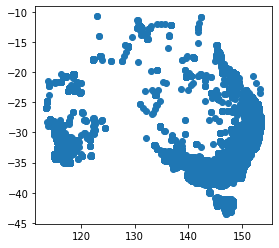

In [38]:
au_tiles.centroid.plot()

In [14]:
au_tiles.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location
77,3112301322111002,38735,19398,7,352,38,"POLYGON ((150.77637 -34.02079, 150.78186 -34.0...",POINT (150.77911 -34.02307)
195,3112320211131223,38934,11800,22,12,7,"POLYGON ((147.61780 -37.81846, 147.62329 -37.8...",POINT (147.62054 -37.82063)
249,3130100233020201,54617,18212,25,63,27,"POLYGON ((147.31018 -42.89206, 147.31567 -42.8...",POINT (147.31293 -42.89408)
275,3112231211312303,32255,2015,61,129,24,"POLYGON ((144.78333 -37.91387, 144.78882 -37.9...",POINT (144.78607 -37.91603)
328,3112301330200101,47832,23213,10,425,130,"POLYGON ((151.19934 -33.87042, 151.20483 -33.8...",POINT (151.20209 -33.87270)
338,3112302212220023,27534,2518,40,46,5,"POLYGON ((146.95862 -35.97356, 146.96411 -35.9...",POINT (146.96136 -35.97578)
354,3112231312213112,2620,4037,627,1,1,"POLYGON ((145.71167 -38.17343, 145.71716 -38.1...",POINT (145.71442 -38.17559)
419,3103023223323312,36295,17877,6,146,25,"POLYGON ((115.91675 -31.93818, 115.92224 -31.9...",POINT (115.91949 -31.94051)
496,3112130032010010,25137,12254,11,3,2,"POLYGON ((152.67700 -27.99440, 152.68250 -27.9...",POINT (152.67975 -27.99683)
517,3112301321103013,40824,12780,12,137,45,"POLYGON ((151.05652 -33.76545, 151.06201 -33.7...",POINT (151.05927 -33.76773)


In [12]:
au_tiles.centroid

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


77         POINT (150.77911 -34.02307)
195        POINT (147.62054 -37.82063)
249        POINT (147.31293 -42.89408)
275        POINT (144.78607 -37.91603)
328        POINT (151.20209 -33.87270)
                      ...             
6937648    POINT (152.99835 -25.99014)
6937785    POINT (144.35211 -36.77629)
6937983    POINT (146.33514 -34.51787)
6938097    POINT (131.48163 -26.00989)
6938521    POINT (152.94342 -27.06157)
Length: 88654, dtype: geometry

In [13]:
au_tiles['location'] = au_tiles.centroid

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
/Users/richardferrers/miniconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [15]:
au_tiles.location

77         POINT (150.77911 -34.02307)
195        POINT (147.62054 -37.82063)
249        POINT (147.31293 -42.89408)
275        POINT (144.78607 -37.91603)
328        POINT (151.20209 -33.87270)
                      ...             
6937648    POINT (152.99835 -25.99014)
6937785    POINT (144.35211 -36.77629)
6937983    POINT (146.33514 -34.51787)
6938097    POINT (131.48163 -26.00989)
6938521    POINT (152.94342 -27.06157)
Name: location, Length: 88654, dtype: geometry

In [18]:
lat = au_tiles.location.x
lat

77         150.779114
195        147.620544
249        147.312927
275        144.786072
328        151.202087
              ...    
6937648    152.998352
6937785    144.352112
6937983    146.335144
6938097    131.481628
6938521    152.943420
Length: 88654, dtype: float64

In [19]:
au_tiles['long'] = au_tiles.location.x

/Users/richardferrers/miniconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [21]:
au_tiles['lat'] = au_tiles.location.y

In [22]:
au_tiles.head(10)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat
77,3112301322111002,38735,19398,7,352,38,"POLYGON ((150.77637 -34.02079, 150.78186 -34.0...",POINT (150.77911 -34.02307),150.779114,-34.023071
195,3112320211131223,38934,11800,22,12,7,"POLYGON ((147.61780 -37.81846, 147.62329 -37.8...",POINT (147.62054 -37.82063),147.620544,-37.820633
249,3130100233020201,54617,18212,25,63,27,"POLYGON ((147.31018 -42.89206, 147.31567 -42.8...",POINT (147.31293 -42.89408),147.312927,-42.894076
275,3112231211312303,32255,2015,61,129,24,"POLYGON ((144.78333 -37.91387, 144.78882 -37.9...",POINT (144.78607 -37.91603),144.786072,-37.916034
328,3112301330200101,47832,23213,10,425,130,"POLYGON ((151.19934 -33.87042, 151.20483 -33.8...",POINT (151.20209 -33.87270),151.202087,-33.872696
338,3112302212220023,27534,2518,40,46,5,"POLYGON ((146.95862 -35.97356, 146.96411 -35.9...",POINT (146.96136 -35.97578),146.961365,-35.975783
354,3112231312213112,2620,4037,627,1,1,"POLYGON ((145.71167 -38.17343, 145.71716 -38.1...",POINT (145.71442 -38.17559),145.714417,-38.175592
419,3103023223323312,36295,17877,6,146,25,"POLYGON ((115.91675 -31.93818, 115.92224 -31.9...",POINT (115.91949 -31.94051),115.919495,-31.940509
496,3112130032010010,25137,12254,11,3,2,"POLYGON ((152.67700 -27.99440, 152.68250 -27.9...",POINT (152.67975 -27.99683),152.679749,-27.996827
517,3112301321103013,40824,12780,12,137,45,"POLYGON ((151.05652 -33.76545, 151.06201 -33.7...",POINT (151.05927 -33.76773),151.059265,-33.767732


In [23]:
au_tiles.to_csv('speedtest-AUS-2020-04-01')

In [28]:
au_tiles.sum()

quadkey       3112301322111002311232021113122331301002330202...
avg_d_kbps                                           2987877924
avg_u_kbps                                           1086985870
avg_lat_ms                                              3816636
tests                                                   3073738
devices                                                  761727
long                                                1.28287e+07
lat                                                -2.92914e+06
dtype: object

In [29]:
au_tiles.mean()

quadkey                inf
avg_d_kbps    3.370269e+04
avg_u_kbps    1.226099e+04
avg_lat_ms    4.305092e+01
tests         3.467117e+01
devices       8.592133e+00
long          1.447052e+02
lat          -3.304017e+01
dtype: float64

In [30]:
au_tiles.describe()

,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,long,lat
count,88654.000000,88654.000000,88654.000000,88654.000000,88654.000000,88654.000000,88654.000000
mean,33702.685993,12260.990705,43.050917,34.671171,8.592133,144.705239,-33.040169
std,21166.131499,10737.826269,114.212889,73.832828,14.253466,10.549001,5.158159
min,1.000000,1.000000,0.000000,1.000000,1.000000,113.529968,-43.482819
25%,20720.000000,4248.250000,11.000000,2.000000,1.000000,144.467468,-37.372340
50%,33496.500000,12461.000000,17.000000,8.000000,3.000000,147.241516,-33.863574
75%,43871.500000,17478.000000,32.000000,37.000000,11.000000,151.322937,-30.072659
max,724326.000000,521442.000000,5751.000000,7339.000000,504.000000,153.569641,-10.765858


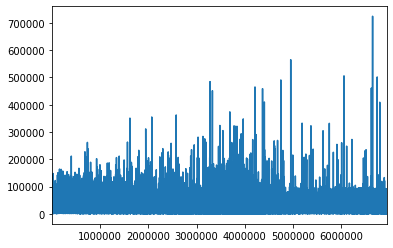

In [31]:
au_tiles.avg_d_kbps.plot()

In [33]:
au_tiles.sort_values('avg_d_kbps')

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat
6546095,3112130003103132,1,724,32,1,1,"POLYGON ((152.47925 -27.42541, 152.48474 -27.4...",POINT (152.48199 -27.42785),152.481995,-27.427852
3660285,3112130302221320,3,640,48,1,1,"POLYGON ((153.34717 -28.87354, 153.35266 -28.8...",POINT (153.34991 -28.87594),153.349915,-28.875945
4268980,3112132013323213,3,1314,1258,1,1,"POLYGON ((153.16589 -30.13088, 153.17139 -30.1...",POINT (153.16864 -30.13325),153.168640,-30.133251
2931824,3112301200231320,5,1648,48,1,1,"POLYGON ((149.21631 -33.38559, 149.22180 -33.3...",POINT (149.21906 -33.38788),149.219055,-33.387880
4140173,3130100233003032,5,4665,5,1,1,"POLYGON ((147.35962 -42.85583, 147.36511 -42.8...",POINT (147.36237 -42.85785),147.362366,-42.857846
...,...,...,...,...,...,...,...,...,...,...
4746167,3112203021333302,490861,40212,6,2,1,"POLYGON ((138.49365 -35.16034, 138.49915 -35.1...",POINT (138.49640 -35.16258),138.496399,-35.162582
6743211,3110322313311220,501795,9195,13,1,1,"POLYGON ((149.01855 -21.15624, 149.02405 -21.1...",POINT (149.02130 -21.15880),149.021301,-21.158800
6055041,3112203210023120,505843,43052,4,3,1,"POLYGON ((138.58154 -35.57692, 138.58704 -35.5...",POINT (138.58429 -35.57915),138.584290,-35.579150
4950908,3112231211212331,565112,45443,3,2,1,"POLYGON ((144.61853 -37.91820, 144.62402 -37.9...",POINT (144.62128 -37.92037),144.621277,-37.920368


In [34]:
au_tiles.sort_values('avg_d_kbps').tail(25)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat
3836970,3112231211212312,321229,40487,3,5,1,"POLYGON ((144.61304 -37.91387, 144.61853 -37.9...",POINT (144.61578 -37.91603),144.615784,-37.916034
3797448,3112132223302301,321617,29826,19,11,1,"POLYGON ((152.42981 -31.85890, 152.43530 -31.8...",POINT (152.43256 -31.86123),152.432556,-31.861230
3774327,3112130013013123,322536,221521,3,1,1,"POLYGON ((153.08899 -27.42541, 153.09448 -27.4...",POINT (153.09174 -27.42785),153.091736,-27.427852
5369790,3112132223332302,322952,39258,15,1,1,"POLYGON ((152.51221 -31.93818, 152.51770 -31.9...",POINT (152.51495 -31.94051),152.514954,-31.940509
3483174,3112203023111301,324161,32438,7,1,1,"POLYGON ((138.49915 -35.19177, 138.50464 -35.1...",POINT (138.50189 -35.19401),138.501892,-35.194011
5750656,3112302031222120,331999,37927,9,6,1,"POLYGON ((147.32666 -35.14686, 147.33215 -35.1...",POINT (147.32941 -35.14911),147.329407,-35.149109
3693204,3112301330220331,332557,329228,4,3,2,"POLYGON ((151.21033 -33.97070, 151.21582 -33.9...",POINT (151.21307 -33.97298),151.213074,-33.972976
5186479,3112231212321201,332575,189423,6,3,1,"POLYGON ((144.36584 -38.22092, 144.37134 -38.2...",POINT (144.36859 -38.22308),144.368591,-38.223078
3967214,3112301330201203,348100,46443,23,1,1,"POLYGON ((151.22131 -33.89322, 151.22681 -33.8...",POINT (151.22406 -33.89550),151.224060,-33.895497
1618785,3112231212121200,351102,41341,8,6,2,"POLYGON ((144.36035 -38.08269, 144.36584 -38.0...",POINT (144.36310 -38.08485),144.363098,-38.084851


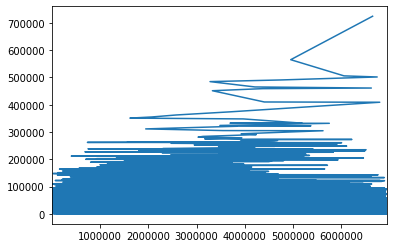

In [36]:
au_tiles.sort_values('avg_d_kbps').avg_d_kbps.plot()

In [37]:
au_tiles.sort_values('avg_d_kbps').head(25)

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,geometry,location,long,lat
6546095,3112130003103132,1,724,32,1,1,"POLYGON ((152.47925 -27.42541, 152.48474 -27.4...",POINT (152.48199 -27.42785),152.481995,-27.427852
3660285,3112130302221320,3,640,48,1,1,"POLYGON ((153.34717 -28.87354, 153.35266 -28.8...",POINT (153.34991 -28.87594),153.349915,-28.875945
4268980,3112132013323213,3,1314,1258,1,1,"POLYGON ((153.16589 -30.13088, 153.17139 -30.1...",POINT (153.16864 -30.13325),153.168640,-30.133251
2931824,3112301200231320,5,1648,48,1,1,"POLYGON ((149.21631 -33.38559, 149.22180 -33.3...",POINT (149.21906 -33.38788),149.219055,-33.387880
4140173,3130100233003032,5,4665,5,1,1,"POLYGON ((147.35962 -42.85583, 147.36511 -42.8...",POINT (147.36237 -42.85785),147.362366,-42.857846
3596172,3112231313222212,6,241,182,1,1,"POLYGON ((145.90942 -38.25975, 145.91492 -38.2...",POINT (145.91217 -38.26191),145.912170,-38.261906
3601076,3112130031302132,7,679,21,1,1,"POLYGON ((153.13843 -27.89249, 153.14392 -27.8...",POINT (153.14117 -27.89492),153.141174,-27.894922
6826591,3112132012301112,9,2438,631,1,1,"POLYGON ((152.83081 -29.99776, 152.83630 -29.9...",POINT (152.83356 -30.00014),152.833557,-30.000138
5956679,3112123303003030,11,153,31,1,1,"POLYGON ((150.87524 -31.09998, 150.88074 -31.0...",POINT (150.87799 -31.10233),150.877991,-31.102334
3601445,3103201123033030,12,1209,855,1,1,"POLYGON ((117.21313 -32.96259, 117.21863 -32.9...",POINT (117.21588 -32.96489),117.215881,-32.964891


In [45]:
superfast = au_tiles.loc[au_tiles['avg_d_kbps'] > 1e05, ['avg_d_kbps', 'long', 'lat', 'tests','location']]
superfast

,avg_d_kbps,long,lat,tests,location
3329,108841,144.341125,-38.175592,57,POINT (144.34113 -38.17559)
28440,147981,149.235535,-35.368895,44,POINT (149.23553 -35.36890)
55245,107849,143.863220,-37.577236,63,POINT (143.86322 -37.57724)
71416,122392,144.379578,-38.166955,56,POINT (144.37958 -38.16695)
78782,110708,144.346619,-38.132396,61,POINT (144.34662 -38.13240)
...,...,...,...,...,...
6796193,409213,145.456238,-38.089175,2,POINT (145.45624 -38.08917)
6805469,122303,145.835266,-41.040002,1,POINT (145.83527 -41.04000)
6838311,119338,144.945374,-37.599000,1,POINT (144.94537 -37.59900)
6889909,133141,116.133728,-31.772543,1,POINT (116.13373 -31.77254)


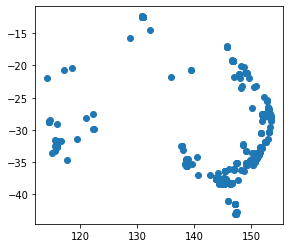

In [48]:
superfast = superfast.set_geometry('location')
superfast.plot()
# need to reset geometry property to 'Location'